In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [56]:
gr = nx.grid_graph((6,6))

In [57]:
# want to compute the heat kernel
# need the Laplacian eigenvectors and eigenvalues
lapl = -1*nx.laplacian_matrix(gr).toarray()
print(lapl)
evals, evects = np.linalg.eigh(lapl)

[[-2  1  0 ...  0  0  0]
 [ 1 -3  1 ...  0  0  0]
 [ 0  1 -3 ...  0  0  0]
 ...
 [ 0  0  0 ... -3  1  0]
 [ 0  0  0 ...  1 -3  1]
 [ 0  0  0 ...  0  1 -2]]


In [58]:
U = evects
def hkt(t):
    exp = np.exp(t * evals)
    lamb = np.diag(exp)
    return U.dot(lamb).dot(U.T)

In [59]:
initial_heat = np.zeros(36)
initial_heat[12] = 1.0

In [60]:
node_pos = nx.spring_layout(gr)

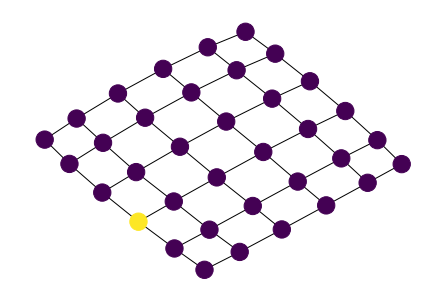

In [61]:
nx.draw(gr,
        node_color = initial_heat,
        pos=node_pos
       )

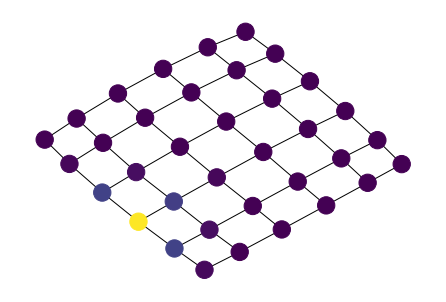

In [62]:
nx.draw(gr,
        node_color = hkt(.2).dot(initial_heat),
        pos=node_pos
       )

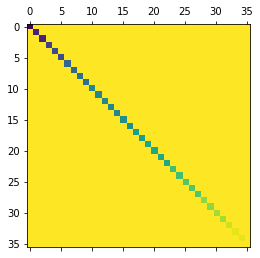

In [63]:
plt.matshow(np.diag(evals))

In [64]:
def heat_kernel_signature(t_values):
    all_results = []
    for t in t_values:
        kernel = hkt(t)
        diagonal = np.diag(kernel)
        rez = np.mean(diagonal)
        all_results.append(rez)
    return np.array(all_results)

In [65]:
heat_kernel_signature([.1,.2,.3,1.0,3.0])

array([0.73001966, 0.55248214, 0.43238649, 0.15234607, 0.06250053])